In [87]:
import os
import math
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def plot_tensorboard_scalars_grid(log_dirs: dict, scalar_names: list, max_cols: int = 2):
    """
    Plots TensorBoard scalar values from multiple runs in a grid layout.

    Args:
        log_dirs (dict): Mapping from label name (str) to log directory path (str).
        scalar_names (list): List of scalar tag names to plot (str).
        max_cols (int): Maximum number of columns in the grid layout.
    """
    num_scalars = len(scalar_names)
    cols = min(max_cols, num_scalars)
    rows = math.ceil(num_scalars / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axs = axs.flatten() if num_scalars > 1 else [axs]

    for i, scalar_name in enumerate(scalar_names):
        ax = axs[i]
        found = False

        for label, log_dir in log_dirs.items():
            if not os.path.exists(log_dir):
                print(f"[WARN] Directory not found: {log_dir}. Skipping '{label}'.")
                continue

            event_acc = EventAccumulator(log_dir)
            try:
                event_acc.Reload()
            except Exception as e:
                print(f"[ERROR] Failed to load {log_dir}: {e}")
                continue

            if scalar_name not in event_acc.Tags().get('scalars', []):
                print(f"[INFO] Scalar '{scalar_name}' not found in '{label}'.")
                continue

            events = event_acc.Scalars(scalar_name)
            steps = [e.step for e in events]
            values = [e.value for e in events]

            ax.plot(steps, values, label=label)
            found = True

        ax.set_title(scalar_name)
        ax.set_xlabel("Step")
        ax.set_ylabel("Value")
        ax.grid(True)
        if found:
            ax.legend()
        else:
            ax.text(0.5, 0.5, "Scalar not found", ha='center', va='center')
            ax.set_axis_off()

    # Turn off any unused axes
    for j in range(len(scalar_names), len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle("TensorBoard Scalars Comparison", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [88]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def plot_novel_base_hmean_bar_chart(log_dirs: dict):
    """
    Creates a bar chart comparing 'novel_classes/accuracy', 'base_classes/accuracy',
    and their harmonic mean for multiple TensorBoard runs.

    Args:
        log_dirs (dict): Mapping from label name (str) to log directory path (str).
    """
    novel_values = []
    base_values = []
    hmean_values = []
    run_labels = []

    for label, log_dir in log_dirs.items():
        if not os.path.exists(log_dir):
            print(f"[WARN] Directory not found: {log_dir}. Skipping '{label}'.")
            continue

        event_acc = EventAccumulator(log_dir)
        try:
            event_acc.Reload()
        except Exception as e:
            print(f"[ERROR] Failed to load {log_dir}: {e}")
            continue

        tags = event_acc.Tags().get('scalars', [])
        if 'novel_classes/accuracy' not in tags or 'base_classes/accuracy' not in tags:
            print(f"[INFO] Missing scalars in '{label}'. Skipping.")
            continue

        novel_events = event_acc.Scalars('novel_classes/accuracy')
        base_events = event_acc.Scalars('base_classes/accuracy')

        novel = novel_events[-1].value if novel_events else 0
        base = base_events[-1].value if base_events else 0

        # Harmonic mean: 2 * (base * novel) / (base + novel)
        hmean = 2 * base * novel / (base + novel) if (base + novel) != 0 else 0

        novel_values.append(novel)
        base_values.append(base)
        hmean_values.append(hmean)
        run_labels.append(label)

    # Plotting
    x = np.arange(len(run_labels))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, base_values, width, label='Base Accuracy')
    ax.bar(x,         novel_values, width, label='Novel Accuracy')
    ax.bar(x + width, hmean_values, width, label='Harmonic Mean')

    ax.set_ylabel('Accuracy')
    ax.set_title('Base / Novel / Harmonic Mean Accuracy per Run')
    ax.set_xticks(x)
    ax.set_xticklabels(run_labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

In [89]:
run_names = {
    'kl v2 balanced' : '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_03_rot_period_3_4_ctx_balanced_20250720_134756',
    'kl v2 base' :  '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_01_rot_period_4_4_ctx_base_acc_20250720_125637',
    'kl v1' : '../runs/report_no_pat/from_yaml_base_kl_v1_4_ctx_20250720_073108',
    'kl v2 novel' : '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_03_rot_period_rel_4_ctx_novel_acc_20250720_133801',
    'kl v2 8 ctx' : '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_01_rot_period_4_8_ctx_20250719_125847',
}
scalar_names = [

    'validation_novel/accuracy',
    'validation_base/accuracy',
]


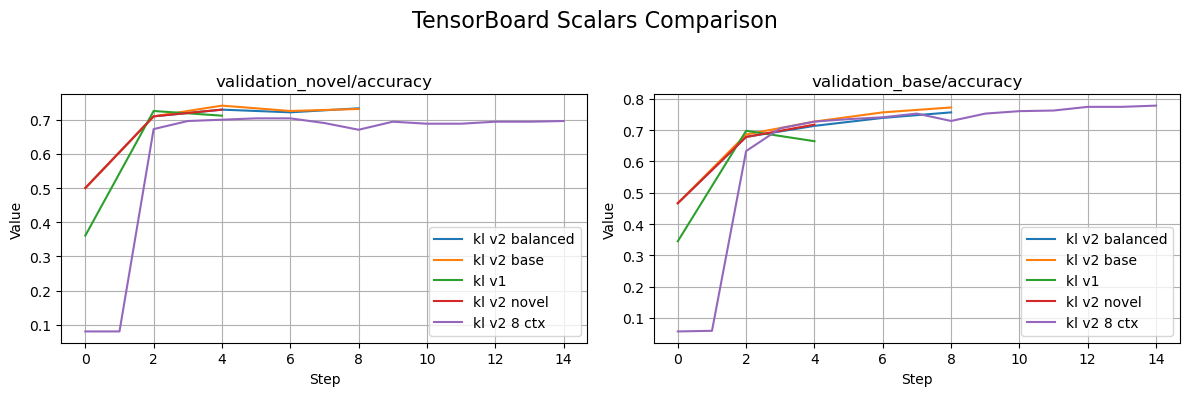

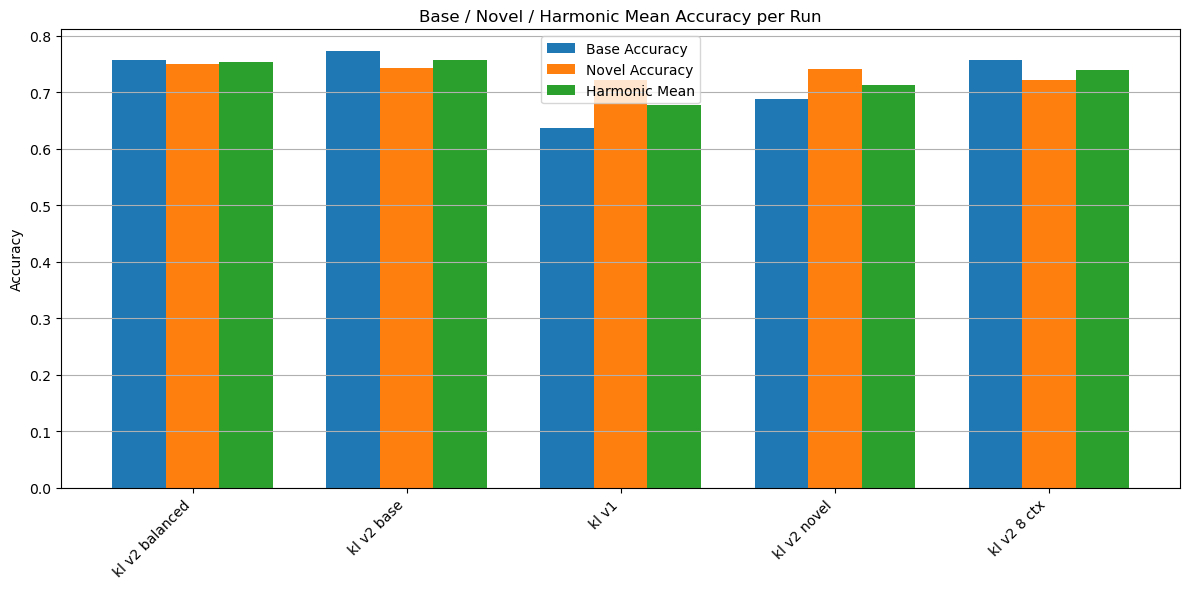

In [90]:
plot_tensorboard_scalars_grid(run_names, scalar_names, max_cols=2)
plot_novel_base_hmean_bar_chart(run_names)

In [91]:
run_names = {
    'kl v2 balanced + adv 4 clusters' : '../runs/report_no_pat/from_yaml_kl_pretrain_adv_4_ctx_4_clusters_adv_3_bias_20250721_004545',
    'only adv 4 clusters' : '../runs/report_no_pat/from_yaml_all_adv_4_ctx_4_clusters_20250721_104046',
    'only adv 4 clusters lambda kl 3' : '../runs/report_no_pat/from_yaml_all_adv_4_ctx_4_clusters_adv_3_20250721_161725',
}
scalar_names = [

    'validation_novel/accuracy',
    'validation_base/accuracy',
    'train_adv/mlp_loss',
]



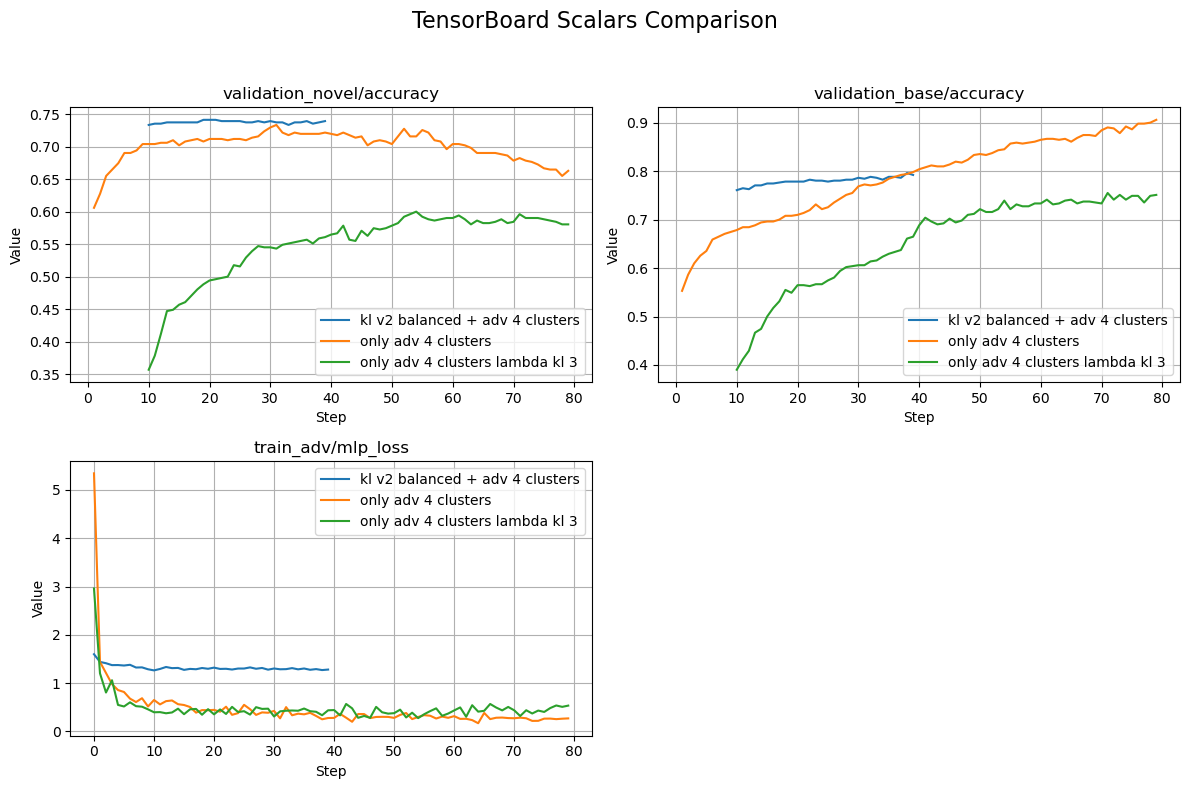

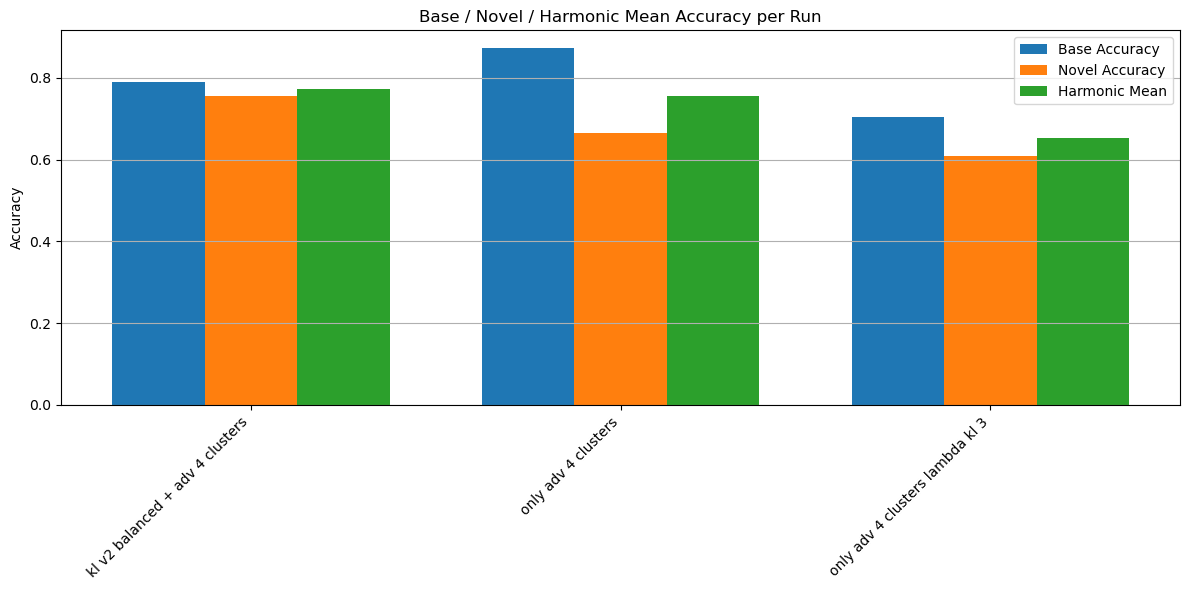

In [92]:
plot_tensorboard_scalars_grid(run_names, scalar_names, max_cols=2)
plot_novel_base_hmean_bar_chart(run_names)

In [93]:
run_names = {
    'kl v2 balanced' : '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_03_rot_period_3_4_ctx_balanced_20250720_134756',
    'kl v2 base' :  '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_01_rot_period_4_4_ctx_base_acc_20250720_125637',
    'kl v2 balanced + adv 4 clusters' : '../runs/report_no_pat/from_yaml_kl_pretrain_adv_4_ctx_4_clusters_adv_3_bias_20250721_004545',
    'kl v1' : '../runs/report_no_pat/from_yaml_base_kl_v1_4_ctx_20250720_073108',
    'kl v2 novel' : '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_03_rot_period_rel_4_ctx_novel_acc_20250720_133801',
    'kl v2 8 ctx' : '../runs/report_no_pat/from_yaml_base_kl_v2_80_20_kl_01_rot_period_4_8_ctx_20250719_125847',
    'only adv adv 4 clusters' : '../runs/report_no_pat/from_yaml_all_adv_4_ctx_4_clusters_20250721_104046',
    'only adv 4 clusters lambda kl 3' : '../runs/report_no_pat/from_yaml_all_adv_4_ctx_4_clusters_adv_3_20250721_161725',
}
scalar_names = [

    'validation_novel/accuracy',
    'validation_base/accuracy',
    'train_adv/mlp_loss',
]



[INFO] Scalar 'train_adv/mlp_loss' not found in 'kl v2 balanced'.
[INFO] Scalar 'train_adv/mlp_loss' not found in 'kl v2 base'.
[INFO] Scalar 'train_adv/mlp_loss' not found in 'kl v1'.
[INFO] Scalar 'train_adv/mlp_loss' not found in 'kl v2 novel'.
[INFO] Scalar 'train_adv/mlp_loss' not found in 'kl v2 8 ctx'.


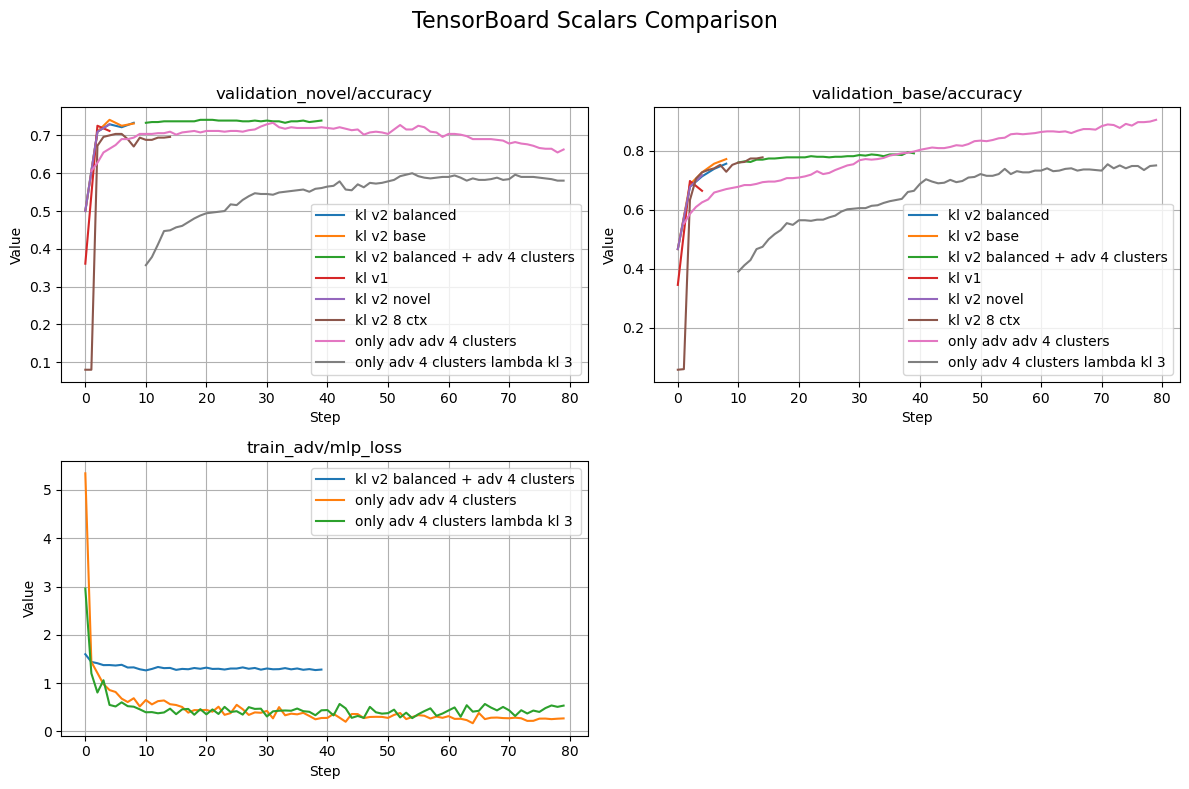

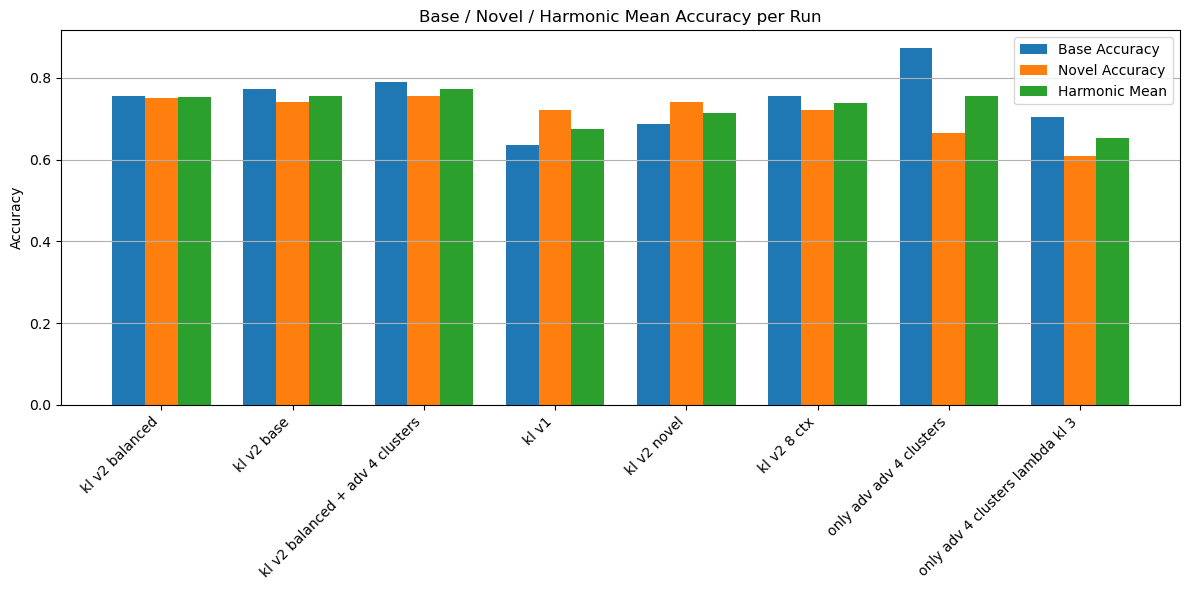

In [94]:
plot_tensorboard_scalars_grid(run_names, scalar_names, max_cols=2)
plot_novel_base_hmean_bar_chart(run_names)